In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr
from keras.preprocessing import sequence
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv1D,MaxPooling1D,Flatten,LSTM,Dropout,BatchNormalization,Activation,Concatenate

from keras.preprocessing import sequence
import re

Using TensorFlow backend.


In [2]:
os.chdir("/Polycarbon/hand Motion Clasification")

In [5]:
df = pd.read_csv("weka-All-EMG - Clean Mode.csv")

In [53]:
df

,RF-R,VL-R,BF-R,GS-R,RF-L,VL-L,BF-L,GS-L,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree_Pose
1,982.0,846.0,982.0,983.0,370.0,204.0,232.0,982.0,Tree_Pose
2,983.0,889.0,982.0,983.0,340.0,351.0,42.0,15.0,Tree_Pose
3,986.0,891.0,983.0,984.0,304.0,192.0,52.0,21.0,Tree_Pose
4,982.0,889.0,983.0,983.0,386.0,112.0,62.0,10.0,Tree_Pose
5,982.0,884.0,984.0,984.0,316.0,90.0,44.0,12.0,Tree_Pose
6,982.0,839.0,983.0,983.0,507.0,123.0,77.0,21.0,Tree_Pose
7,982.0,890.0,982.0,983.0,438.0,144.0,106.0,16.0,Tree_Pose
8,982.0,880.0,984.0,984.0,572.0,163.0,114.0,19.0,Tree_Pose
9,983.0,864.0,983.0,983.0,554.0,764.0,31.0,69.0,Tree_Pose


In [11]:
events = np.split(df, np.where(np.isnan(df["RF-R"]))[0])
# removing NaN entries
events = [ev[~np.isnan(ev["RF-R"])] for ev in events if not isinstance(ev, np.ndarray)]
# removing empty DataFrames
events = [ev for ev in events if not ev.empty]

In [12]:
len(events)

16

In [42]:
x =[]
y=[]
for ev in events:
    smooth = savgol_filter(ev.T.values[0:8], 55, 2) 
    x.append(ev.T.values[0:8])
    y.append(ev.T.values[8][0])

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
ye = encoder.transform(y)

In [15]:
encoder.classes_

array(['Tree_Pose', 'Triangle_Pose', 'warrior1_Pose', 'warrior2_pose'],
      dtype='<U13')

In [52]:
plt.plot(events[0][])

KeyError: 0

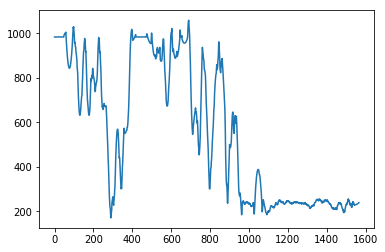

In [33]:
plt.plot(smooth[0])

# Histogram of window lenght 

In [78]:
len(x[0][0])

1566

In [35]:
lenghts = [len(x[i][0]) for i in range(len(x))]


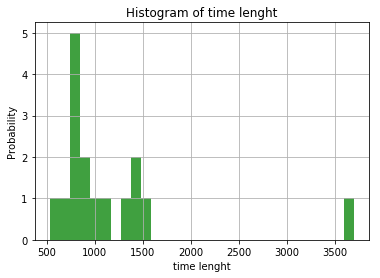

In [8]:

v = [len(x[i][0]) for i in range(len(x))]
# the histogram of the data
n, bins, patches = plt.hist(v, 30, density=False, facecolor='g', alpha=0.75)

mu = np.std(v)
sigma = np.average(v)
plt.xlabel('time lenght')
plt.ylabel('Probability')
plt.title('Histogram of time lenght')
# plt.text(500, 150, r'$\mu='+str(np.trunc(mu))+',\ \sigma='+str(np.trunc(sigma))+'$')0
plt.grid(True)
plt.show()

# build model function

In [36]:
def build_model(window_length,feature_length):
    input_signal = Input(shape=(feature_length,window_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
#     x = LSTM(100, return_sequences=False)(x)
#     x = Dropout(0.5)(x)
    x = Flatten()(x)


    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(17, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def build_model2(window_length,feature_length):
    input_signal = Input(shape=(window_length,feature_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)

    x = Flatten()(x)
   # x = Dropout(0.5)(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(4, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [158]:
len(x[0][0])

30

In [43]:
# #normalize
# g=np.array([normalize(x[0]) for i in range(len(y))])
#padding
X=np.array([sequence.pad_sequences(b, padding="post",maxlen=4000,dtype='float64')for b in x])


In [27]:
from sklearn.preprocessing import normalize
for gt in range(encoder.classes_.size):
    for ch in range(len(X[0])):      
        X[ye==gt][:,ch] = normalize(X[ye==gt][:,ch])

In [12]:
X.shape

(16, 8, 4000)

# feature Selection

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,ye,test_size=0.2,stratify=ye)

model=build_model2(X.shape[1],X.shape[2])  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 500, nb_epoch = 100)


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
12/12 [==============================] - 1s 89ms/step - loss: 1.3825 - acc: 0.2500
Epoch 2/100
12/12 [==============================] - 0s 750us/step - loss: 1.3476 - acc: 0.6667
Epoch 3/100
12/12 [==============================] - 0s 745us/step - loss: 1.3363 - acc: 0.6667
Epoch 4/100
12/12 [==============================] - 0s 748us/step - loss: 1.3216 - acc: 0.8333
Epoch 5/100
12/12 [==============================] - 0s 748us/step - loss: 1.3099 - acc: 0.9167
Epoch 6/100
12/12 [==============================] - 0s 662us/step - loss: 1.2981 - acc: 0.9167
Epoch 7/100
12/12 [==============================] - 0s 750us/step - loss: 1.2851 - acc: 1.0000
Epoch 8/100
12/12 [==============================] - 0s 749us/step - loss: 1.2733 - acc: 1.0000
Epoch 9/100
12/12 [==============================] - 0s 665us/step - loss: 1.2624 - acc: 1.0000
Epoch 10/100
12/12 [==============================] - 0s 662us/step - loss: 1.2511 - acc: 1.0000
Epoch 11/100
12/12 [====================

Epoch 86/100
12/12 [==============================] - 0s 665us/step - loss: 0.2837 - acc: 1.0000
Epoch 87/100
12/12 [==============================] - 0s 746us/step - loss: 0.2748 - acc: 1.0000
Epoch 88/100
12/12 [==============================] - 0s 748us/step - loss: 0.2662 - acc: 1.0000
Epoch 89/100
12/12 [==============================] - 0s 831us/step - loss: 0.2580 - acc: 1.0000
Epoch 90/100
12/12 [==============================] - 0s 748us/step - loss: 0.2500 - acc: 1.0000
Epoch 91/100
12/12 [==============================] - 0s 665us/step - loss: 0.2424 - acc: 1.0000
Epoch 92/100
12/12 [==============================] - 0s 829us/step - loss: 0.2350 - acc: 1.0000
Epoch 93/100
12/12 [==============================] - 0s 748us/step - loss: 0.2279 - acc: 1.0000
Epoch 94/100
12/12 [==============================] - 0s 831us/step - loss: 0.2211 - acc: 1.0000
Epoch 95/100
12/12 [==============================] - 0s 665us/step - loss: 0.2146 - acc: 1.0000
Epoch 96/100
12/12 [==========

In [51]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 58ms/step

acc: 0.00%


Confusion matrix, without normalization
[[0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]]


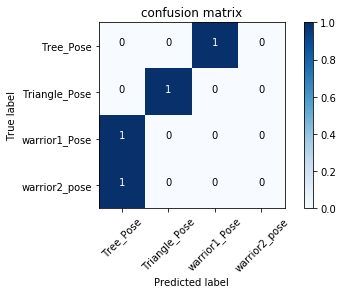

Normalized confusion matrix
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


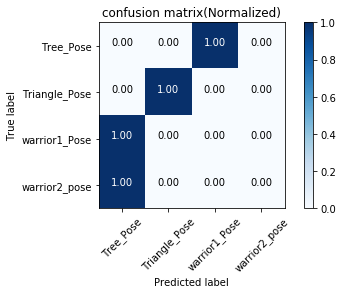

In [49]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
pr.confuse_matrix_plot(y_test,prd,encoder.classes_,title="confusion matrix")

In [170]:
x1 =  x[10][0]

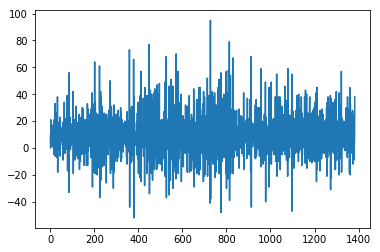

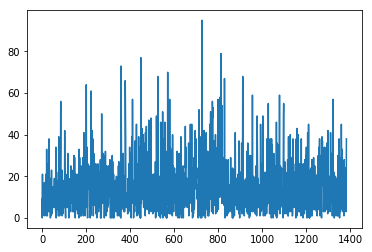

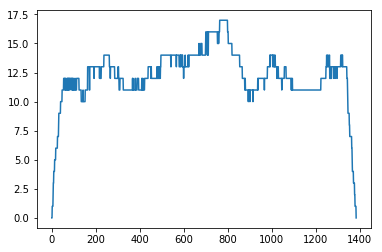

In [178]:
from scipy import signal
x1 =  x[11][0]
plt.plot(x1[0])
plt.show()
plt.plot(x1[8])
plt.show()
y1 = signal.medfilt(x1[8],101) 
plt.plot(y1)
plt.show()

In [198]:
len(x1[:8])
x1[:8]= [signal.medfilt(ch,21)  for ch in x1[:8]]           

In [202]:
X.shape

(6890, 28, 1000)

In [60]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def confuse_matrix_plot(Y,Pred,list_class,title="confusion matrix"):
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, Pred)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=list_class, normalize=False,
                          title=title)
    plt.show()
      # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=list_class, normalize=True,
                          title=title +'(Normalized)')
    plt.show()
